## A deep neural network model for image classification using SVHN Dataset

In [1]:
from __future__ import absolute_import, division, print_function

import scipy.io as spio
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np

 ### Function for converting rgb images from SVHN dataset to grayscale

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

### Function to format the data according to TensorFlow tutorial for simplicity

In [3]:
def formatArray(data):
    im = []
    for i in range(0, data.shape[3]):
        im.append(rgb2gray(data[:, :, :, i]))
    return np.asarray(im)

### Function for updating labels (Replace 10 in labels with 0)

In [4]:
def fixLabel(labels):
    labels[labels == 10] = 0
    return labels


### Load training and test data

In [5]:
mat1 = spio.loadmat('extra_32x32.mat', squeeze_me=True)     # extra data used
mat2 = spio.loadmat('test_32x32.mat', squeeze_me=True)
train_images=mat1['X']
train_labels=mat1['y']
test_images=mat2['X']
test_labels=mat2['y']


Specify class labels

In [6]:
class_names = ['0','1', '2', '3', '4', '5','6', '7', '8', '9']

### Convert to proper format

In [7]:
train_images=formatArray(train_images)
test_images=formatArray(test_images)
train_labels=fixLabel(train_labels)
test_labels=fixLabel(test_labels)

### Normalize the data

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Create the training model

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.23),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Compile the Model

In [10]:
model.compile(optimizer='Adadelta',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Apply the Model with 6 epochs

In [11]:
model.fit(train_images, train_labels, epochs=6)

Epoch 1/6
531131/531131 [==============================] - 187s 352us/sample - loss: 0.6421 - acc: 0.8097
Epoch 2/6
531131/531131 [==============================] - 132s 249us/sample - loss: 0.4836 - acc: 0.8606
Epoch 3/6
531131/531131 [==============================] - 129s 242us/sample - loss: 0.4563 - acc: 0.8687
Epoch 4/6
531131/531131 [==============================] - 110s 208us/sample - loss: 0.4387 - acc: 0.8736
Epoch 5/6
531131/531131 [==============================] - 111s 208us/sample - loss: 0.4287 - acc: 0.8768
Epoch 6/6
531131/531131 [==============================] - 110s 207us/sample - loss: 0.4233 - acc: 0.8775


### Calculate the accuracy and loss on test data

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

26032/26032 [==============================] - 5s 200us/sample - loss: 0.5925 - acc: 0.8479


### Print the test accuracy

In [14]:
print('Test accuracy:', test_acc)

Test accuracy: 0.847918


## Plots

In [15]:
import matplotlib.pyplot as plt

### Function for plotting images

In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

### Function to plot prediction values

In [17]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Save predictions

In [18]:
predictions = model.predict(test_images)

In [21]:
%matplotlib inline

### Plot 6 images with predictions

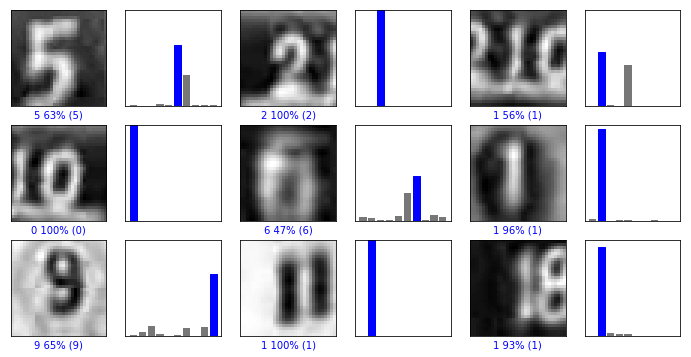

In [22]:
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()